In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from  warnings import simplefilter
simplefilter('ignore')

In [30]:
df = pd.read_csv('bigmart_train.csv')

print(df.shape)

df.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Missing Identification:

In [32]:
df.isna().sum()/df.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

17% values are issing in Item_Weight Column

28% values are issing in Outlet_Size Column


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

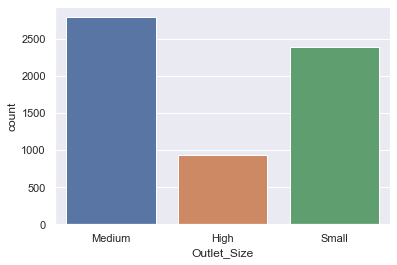

In [33]:
sns.countplot(df.Outlet_Size)

### Missing Treatment:

**Item_Weight** is numeric continuous value , so we r going to fill NAs by the mean.:

In [34]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace= True)

**Outlet_Size** is categorical values, so we r going to fill NAs by most frequent value:

In [35]:
df.Outlet_Size.mode()[0]

'Medium'

In [36]:
# df.Outlet_Size.fillna('Medium', inplace=True)
df.Outlet_Size.fillna(df.Outlet_Size.mode()[0], inplace=True)

In [37]:
df.isna().sum()/df.shape[0] *100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

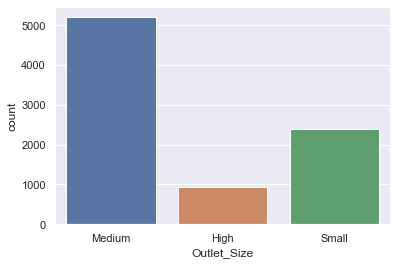

In [38]:
sns.countplot(df.Outlet_Size)

In [39]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [40]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [41]:
df.describe().columns

# df.select_dtypes(include=['float64','int64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [49]:
num_var = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [42]:
df.describe(include='O').columns

# df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [105]:
cat_var = ['Item_Fat_Content', 'Item_Type','Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']

#### Explore Categorical Variables:

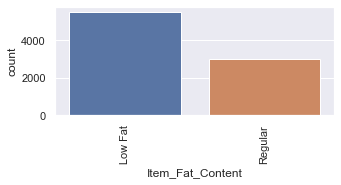

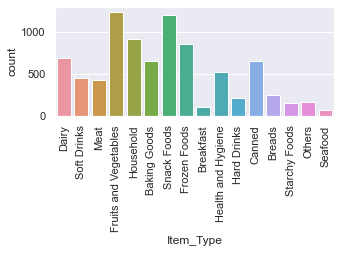

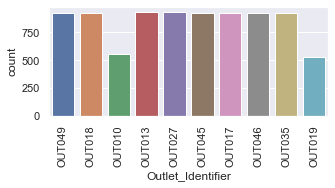

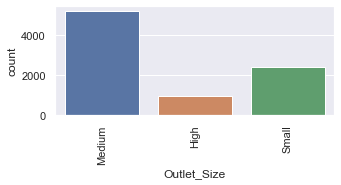

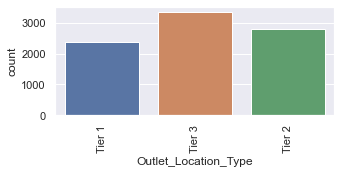

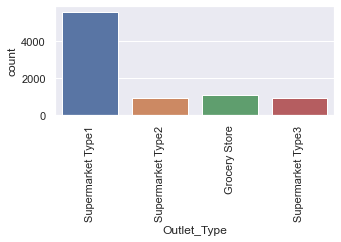

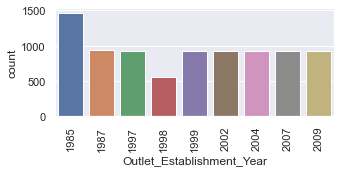

In [107]:
for i in cat_var:
    plt.figure(figsize=(5,2))
    sns.countplot(df[i])
    plt.xticks(rotation= 90)
    plt.show()

#### fix low Fat, LF, reg:

In [45]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [46]:
# df.Item_Fat_Content.replace(['low fat', 'LF'], 'Low Fat')
# df.Item_Fat_Content.replace('reg', 'Regular')

df.Item_Fat_Content.replace(['low fat', 'LF', 'reg'], ['Low Fat','Low Fat','Regular'] , inplace =True)

In [47]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

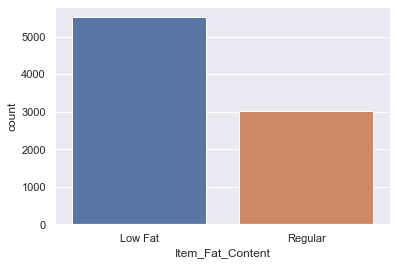

In [48]:
sns.countplot(df.Item_Fat_Content)

In [52]:
cr =df[num_var].corr()

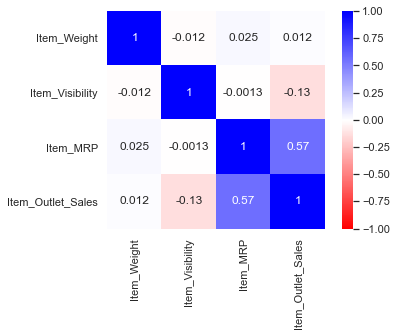

In [56]:
sns.heatmap(cr,cmap='bwr_r',vmin=-1,square=True,annot=True);

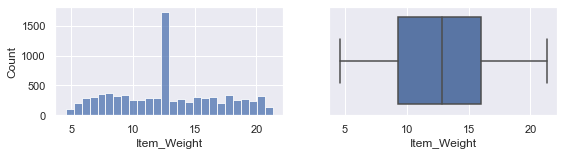

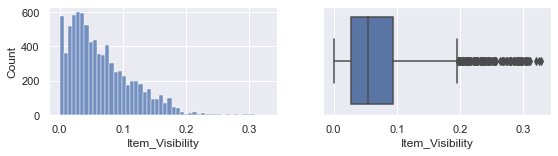

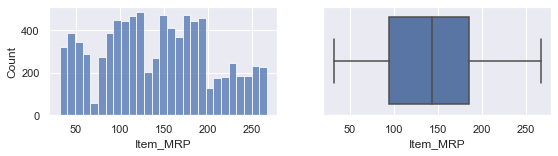

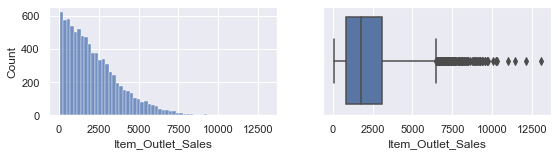

In [57]:
for i in num_var:
    f,a=plt.subplots(1,2,figsize=(9,2))
    sns.histplot(x=i,data=df,ax=a[0])
    sns.boxplot(x=i,data=df,ax=a[1])
    plt.show()

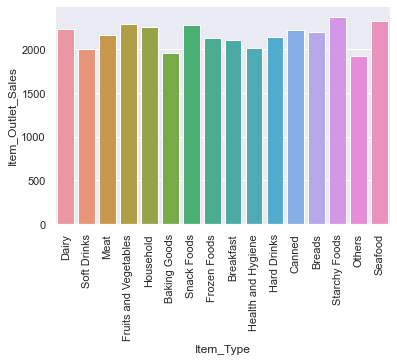

In [64]:
sns.barplot(x=df.Item_Type, y=df.Item_Outlet_Sales,ci=0)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Item_Outlet_Sales'>

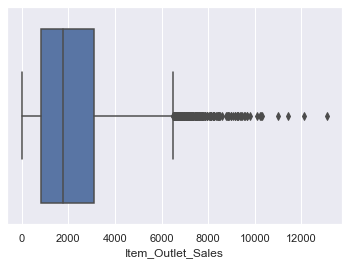

In [74]:
sns.boxplot(df.Item_Outlet_Sales)

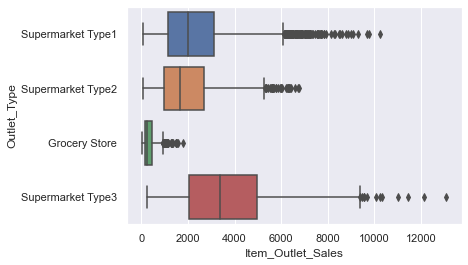

In [84]:
sns.boxplot(y =df.Outlet_Type, x =df.Item_Outlet_Sales, orient='h' );

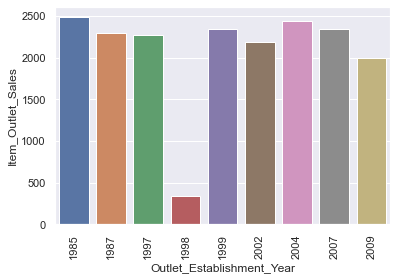

In [86]:
sns.barplot(x=df.Outlet_Establishment_Year, y=df.Item_Outlet_Sales,ci=0)
plt.xticks(rotation=90);

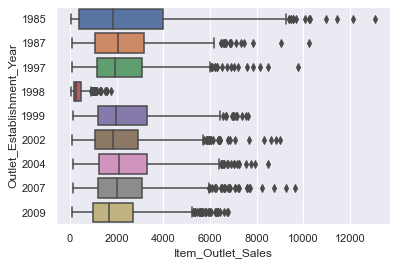

In [87]:
sns.boxplot(y =df.Outlet_Establishment_Year, x =df.Item_Outlet_Sales, orient='h' );

In [123]:
# df.sort_values(by='Item_MRP',ascending=False).head(10)

In [122]:
# df.sort_values(by='Item_Outlet_Sales',ascending=False).head(10)

In [120]:
# df[df.Outlet_Identifier=='OUT027']

In [121]:
# df[df.Outlet_Establishment_Year==1985]

In [116]:
# df.loc[df.Outlet_Establishment_Year==1985,'Outlet_Identifier' ].unique()

array(['OUT027', 'OUT019'], dtype=object)

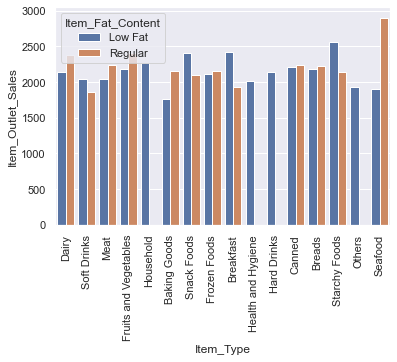

In [119]:
sns.barplot(x=df.Item_Type, y=df.Item_Outlet_Sales,ci=0,hue=df.Item_Fat_Content)
plt.xticks(rotation=90);

In [127]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Feature Engineerig:

#### Adding a new Outlet_Age Column:

In [130]:
df['Outlet_age'] =  2022- df['Outlet_Establishment_Year']

In [134]:
df.head(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,13


In [139]:
# def fun(x):
#     return x[:2]

fun = lambda x : x[:2] 

In [142]:
df['Item_Type_Combined']= df.Item_Identifier.apply(fun)

In [143]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Type_Combined
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23,FD
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24,FD
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,35,FD
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,20,FD
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,18,NC
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,13,FD


In [146]:
# df.Item_Type_Combined.replace(['FD','DR','NC'],['Food','Drink','NonConsumable'])

In [151]:
df.Item_Type_Combined = df.Item_Type_Combined.map({'FD':'Food','DR':'Drink','NC':'NonConsumable'})

In [153]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35,NonConsumable


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

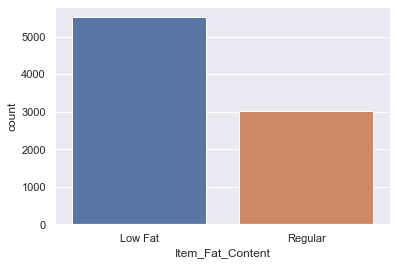

In [154]:
sns.countplot(df.Item_Fat_Content)

In [155]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [164]:
df.loc[df.Item_Type_Combined=='NonConsumable','Item_Fat_Content']= 'Nonedible'

In [166]:
df.Item_Fat_Content.value_counts()

Low Fat      3918
Regular      3006
Nonedible    1599
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

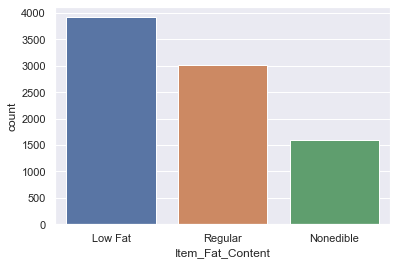

In [167]:
sns.countplot(df.Item_Fat_Content)